# CO2 Emissions Prediction Project

## Project Objective
The primary objective of this project is to build a robust machine learning model capable of accurately predicting CO2 emissions (measured in g/km) based on various vehicle specifications. The target variable for this analysis is 'CO2 Emissions (g/km)'.

This notebook will cover:
1.  Data Loading and Initial Exploration
2.  Exploratory Data Analysis (EDA)
3.  Data Preprocessing and Feature Engineering
4.  Model Training and Evaluation
5.  Conclusion and Future Work

In [191]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

1. Data Loading and Initial Exploration

In [192]:
#Load Data
df = pd.read_csv('CO2 Emissions_Canada.csv')
df.sample(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
2758,INFINITI,Q50 AWD,MID-SIZE,2.0,4,AS7,Z,10.6,8.4,9.6,29,226
3863,JAGUAR,F-TYPE CONVERTIBLE,TWO-SEATER,3.0,6,M6,Z,14.9,9.8,12.6,22,296
4516,BUICK,ENVISION AWD,SUV - SMALL,2.0,4,A6,Z,11.8,9.1,10.6,27,248
3819,HYUNDAI,ELANTRA,MID-SIZE,2.0,4,AS6,X,8.3,6.4,7.4,38,174
5558,BMW,M6 Gran Coupe,COMPACT,4.4,8,AM7,Z,17.3,11.6,14.7,19,344


In [193]:
#Summary statistics
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [194]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [195]:
# Missing values
print(df.isnull().sum())

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [196]:
df.columns = df.columns.str.replace(" (L/100 km)", "").str.replace("(L)", "").str.replace("(g/km)", "").str.replace(" ", "_")
df.columns = df.columns.str.lower()
print(df.columns)

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb',
       'fuel_consumption_comb_(mpg)', 'co2_emissions'],
      dtype='object')


Exploratory Data Analysis (EDA)

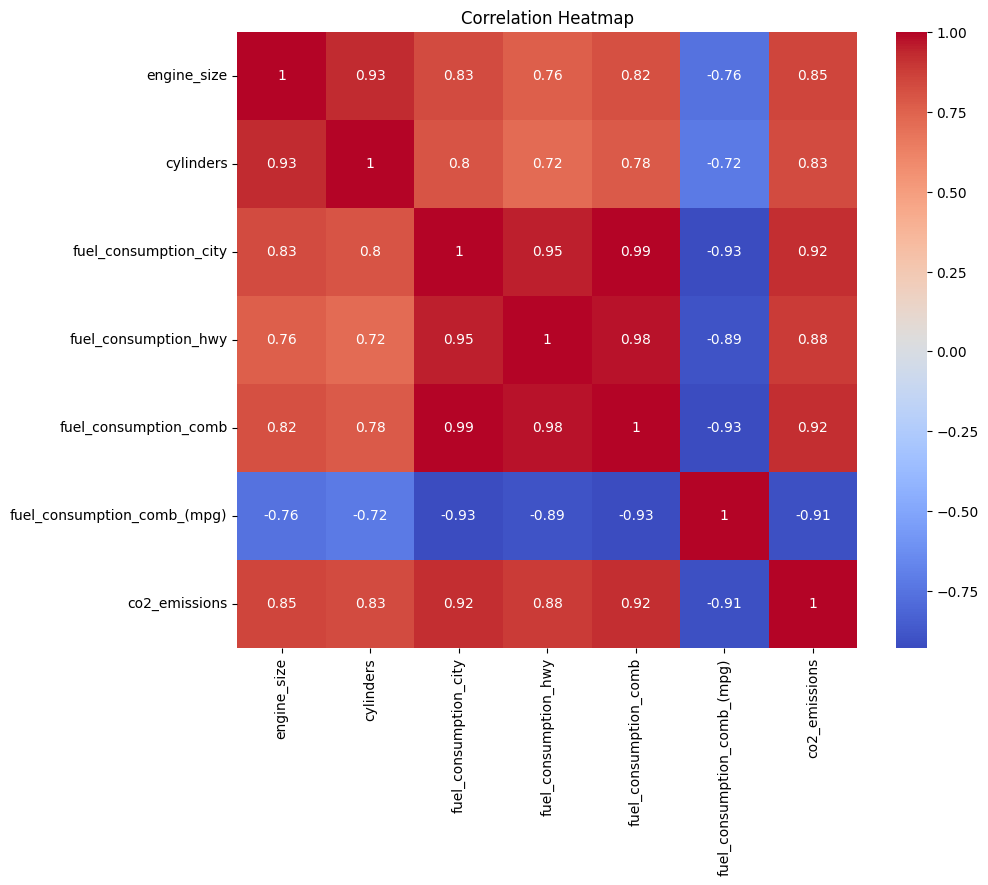

In [197]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


This heatmap shows that fuel consumption and engine size are major contributors to CO2 emissions, while fuel efficiency (mpg) reduces emissions. 

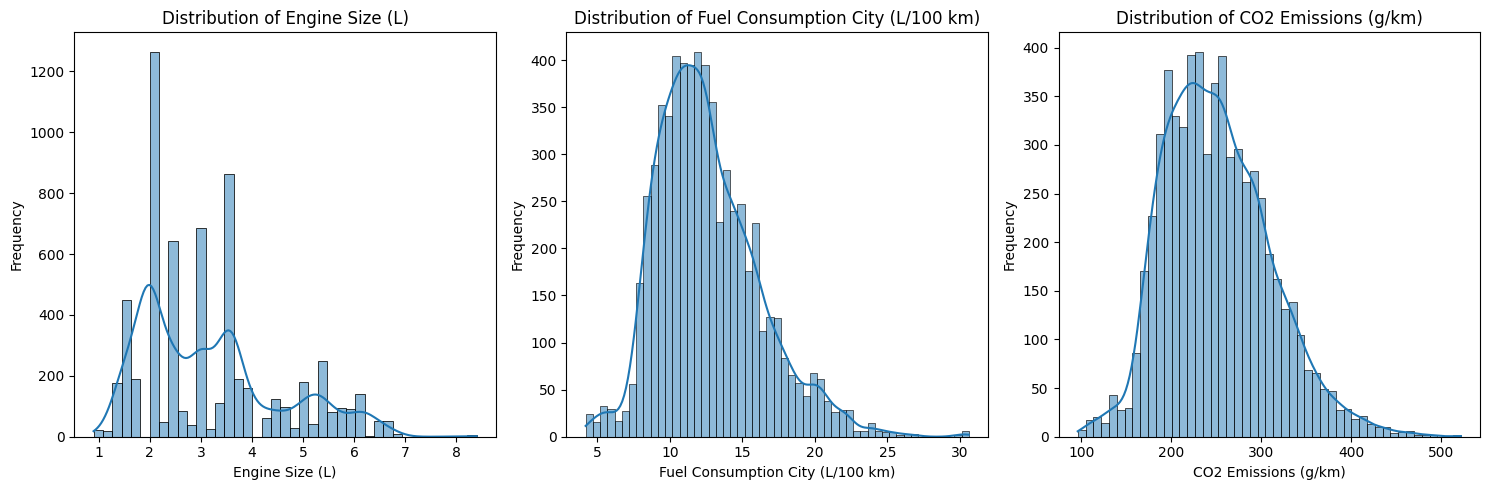

In [211]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['engine_size'], kde=True)
plt.title('Distribution of Engine Size (L)')
plt.xlabel('Engine Size (L)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['fuel_consumption_city'], kde=True)
plt.title('Distribution of Fuel Consumption City (L/100 km)')
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['co2_emissions'], kde=True)
plt.title('Distribution of CO2 Emissions (g/km)')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



Engine Size -  Most vehicles have smaller engine sizes (around 2.0 L is the mode), which is expected as smaller engines are more fuel-efficient and environmentally friendly.

Fule Consumption City - The distribution is approximately normal, centered around 10–12 L/100 km.which is expected as lower fuel consumption is more common.

Co2 emission- The distribution is slightly right-skewed, peaking between 200–250 g/km. Most vehicles emit CO2 within this range, though there are a few high-emission outliers.


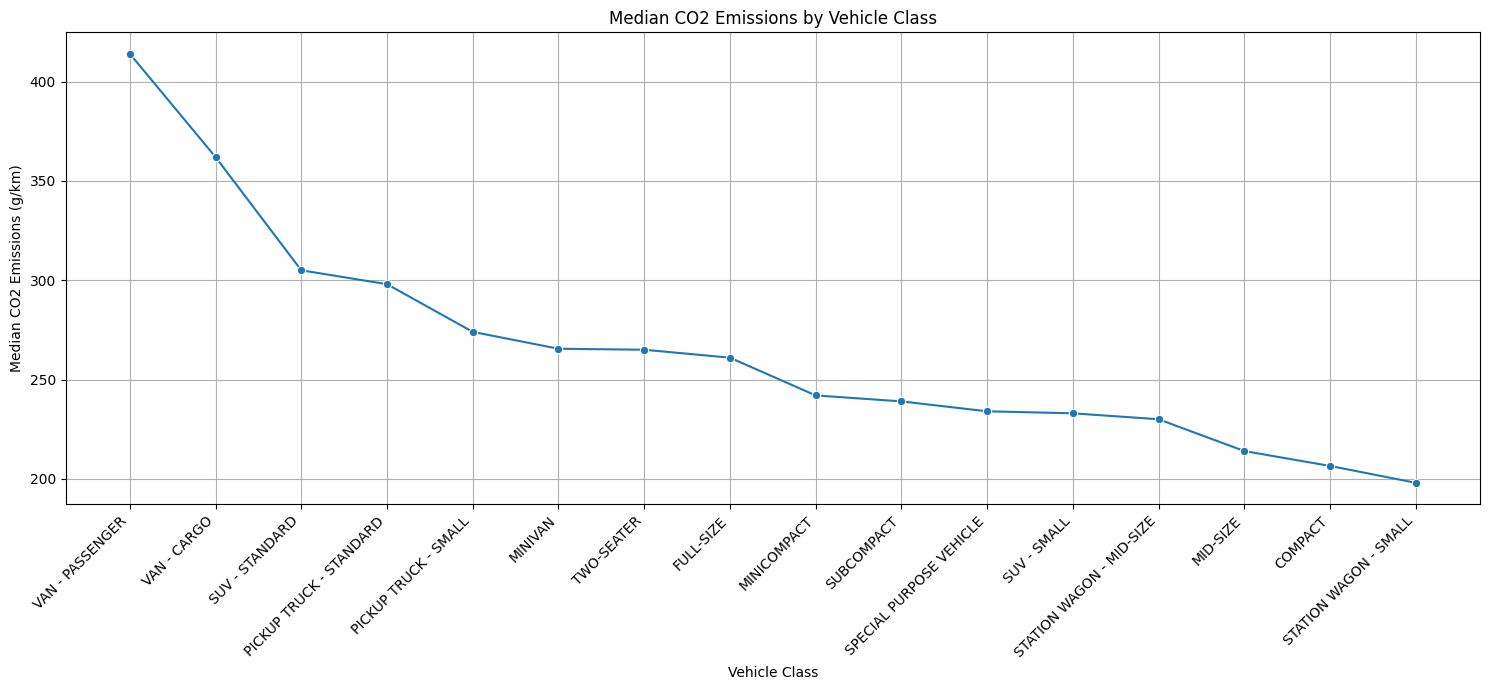

In [199]:

vehicle_medians = df.groupby('vehicle_class')['co2_emissions'].median().sort_values(ascending=False)
# Plot as a line graph
plt.figure(figsize=(15, 7))
sns.lineplot(x=vehicle_medians.index, y=vehicle_medians.values, marker='o')

plt.title('Median CO2 Emissions by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Median CO2 Emissions (g/km)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

This line chart visualizes the median CO2 emissions (g/km) for each vehicle class, sorted from highest to lowest. It provides a clear comparison across different vehicle types, highlighting:

High-emission classes like Passenger Vans, Cargo Vans, and Standard SUVs.

Low-emission classes such as Compact Cars, Mid-size Cars, and Small Station Wagons.

Data Processing 

In [200]:
df = df.drop_duplicates()
df = df.dropna()
df.shape


(6282, 12)

In [201]:
# Split into features (X) and label (y) 
X = df.drop(columns=['co2_emissions'])
X_numeric = X.select_dtypes(include=['number'])
y = df['co2_emissions']

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

Train Model 
1. LinearRegression 

In [203]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

2. Decision Tree

In [204]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

3. Random Forest

In [205]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [206]:
mae_lr = mean_absolute_error(y_test, lr_pred)
mse_lr = mean_squared_error(y_test, lr_pred)
r2_lr = r2_score(y_test, lr_pred)

mae_dt = mean_absolute_error(y_test, dt_pred)
mse_dt = mean_squared_error(y_test, dt_pred)
r2_dt = r2_score(y_test, dt_pred)

mae_rf = mean_absolute_error(y_test, rf_pred)
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)


In [207]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [mae_lr, mae_dt, mae_rf],
    'MSE': [mse_lr, mse_dt, mse_rf],
    'R2': [r2_lr, r2_dt, r2_rf]
})
print('\nModel Comparison Table:')
print(results)


Model Comparison Table:
               Model        MAE         MSE        R2
0  Linear Regression  12.102141  368.322859  0.897935
1      Decision Tree   3.434838  131.155825  0.963656
2      Random Forest   3.655894   93.474509  0.974098


Random Forest is the best performer with highest R² and lowest MSE, meaning it explains 97.5% of variance in CO₂ emissions.

Decision Tree also performs well but might be slightly more prone to overfitting.

Linear Regression is the weakest since it assumes a straight-line relationship and misses complex interactions.

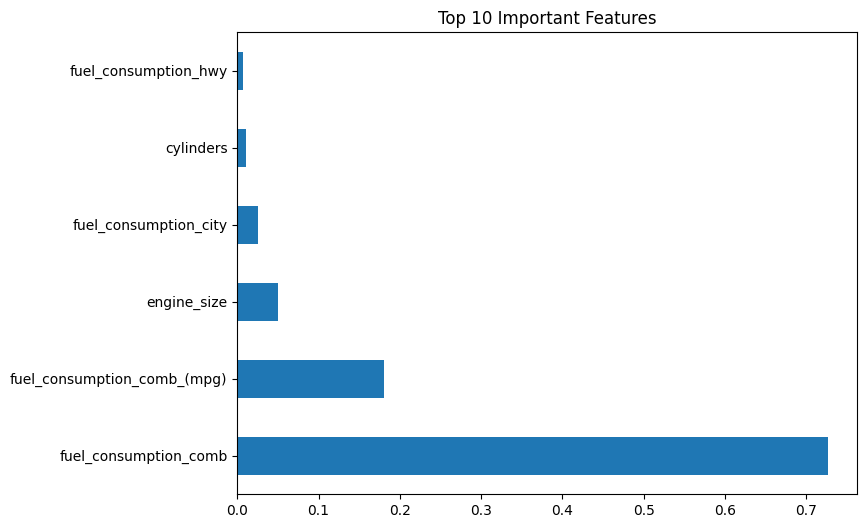

In [208]:
plt.figure(figsize=(8, 6))
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

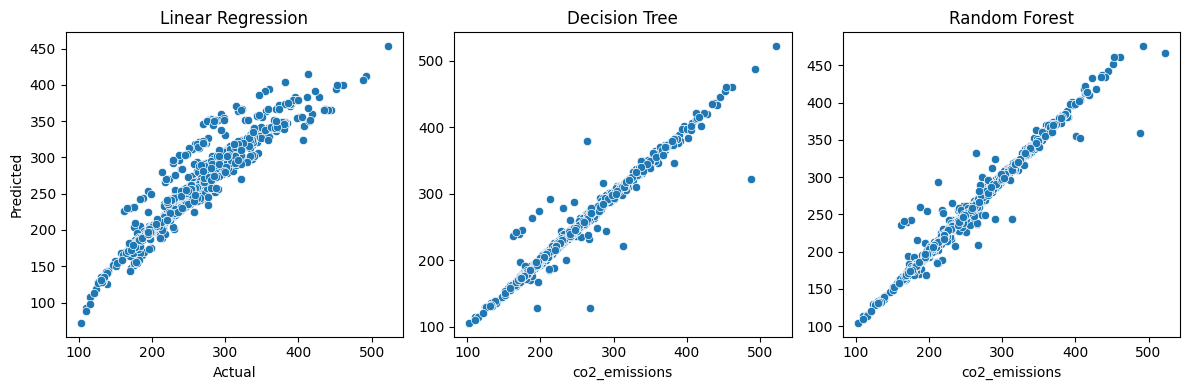

In [209]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=lr_pred)
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=dt_pred)
plt.title('Decision Tree')

plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=rf_pred)
plt.title('Random Forest')

plt.tight_layout()
plt.show()


## Save model 

In [210]:
import joblib

# Save Linear Regression model
joblib.dump(lr_model, 'linear_regression_model.joblib')

# Save Decision Tree model
joblib.dump(dt_model, 'decision_tree_model.joblib')

# Save Random Forest model
joblib.dump(rf_model, 'random_forest_model.joblib')


['random_forest_model.joblib']